In [1]:
# pandas, numpy, matplotlib.pyplot, tensorflow 라이브러리를 가져옴
# sklearn 라이브러리에서 train_test_split함수와 StandardScaler, LabelEncoder, KNeighborsClassifier, train_test_split를 가져옴
# StandardScaler: 데이터를 표준화하는 도구(평균 0, 분산 1)
# LabelEncoder: 범주형 데이터를 숫자형으로 변환
# KNeighborsClassifier: K-최근접 이웃(KNN) 알고리즘을 구현한 것
# train_test_split: 데이터를 학습용과 테스터용으로 나누는 데 사용
# seaborn 라이브러리를 가져옴
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from tensorflow import keras

In [2]:
# 파일을 읽고 데이터프레임(df)로 저장
df = pd.read_excel('C:/Users/Yujin/Downloads/Raisin_Dataset.xlsx')

In [3]:
df

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen
...,...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,Besni
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,Besni
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,Besni
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,Besni


In [7]:
df.columns

Index(['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'ConvexArea', 'Extent', 'Perimeter', 'Class'],
      dtype='object')

Text(0.5, 1.0, 'Class')

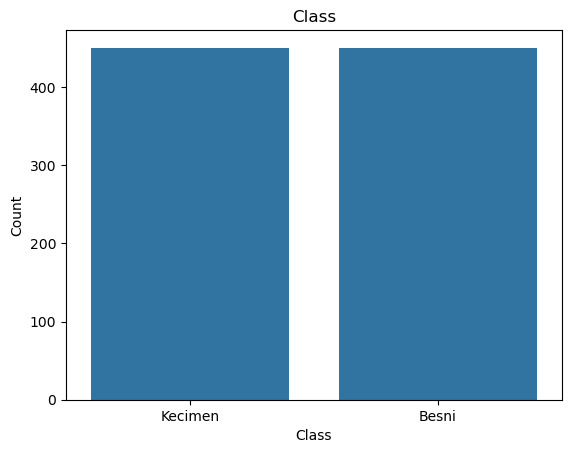

In [9]:
# 결과 갯수 확인 (그래프)
sns.countplot(data = df, x="Class")
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class")

In [11]:
# 결과 갯수 확인 (숫자)
df['Class'].value_counts()

Class
Kecimen    450
Besni      450
Name: count, dtype: int64

In [15]:
# 결측치 확인
df.isnull().sum()

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64

In [17]:
# 결측치 제거
df = df.dropna()
df.isnull().sum()

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64

In [19]:
# Class 열을 제거, head() 메서드를 사용해 처음 5행을 출력
X=df.drop('Class',axis=1)
X.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251


In [23]:
y = df['Class']
y.value_counts()

Class
Kecimen    450
Besni      450
Name: count, dtype: int64

In [25]:
y.head()

0    Kecimen
1    Kecimen
2    Kecimen
3    Kecimen
4    Kecimen
Name: Class, dtype: object

In [29]:
Y = pd.get_dummies(y).values

In [31]:
X = X.values

In [33]:
X

array([[8.75240000e+04, 4.42246011e+02, 2.53291155e+02, ...,
        9.05460000e+04, 7.58650579e-01, 1.18404000e+03],
       [7.51660000e+04, 4.06690687e+02, 2.43032436e+02, ...,
        7.87890000e+04, 6.84129570e-01, 1.12178600e+03],
       [9.08560000e+04, 4.42267048e+02, 2.66328318e+02, ...,
        9.37170000e+04, 6.37612812e-01, 1.20857500e+03],
       ...,
       [9.96570000e+04, 4.31706981e+02, 2.98837323e+02, ...,
        1.06264000e+05, 7.41098519e-01, 1.29282800e+03],
       [9.35230000e+04, 4.76344094e+02, 2.54176054e+02, ...,
        9.76530000e+04, 6.58798253e-01, 1.25854800e+03],
       [8.56090000e+04, 5.12081774e+02, 2.15271976e+02, ...,
        8.91970000e+04, 6.32019963e-01, 1.27286200e+03]])

In [35]:
y

0      Kecimen
1      Kecimen
2      Kecimen
3      Kecimen
4      Kecimen
        ...   
895      Besni
896      Besni
897      Besni
898      Besni
899      Besni
Name: Class, Length: 900, dtype: object

In [37]:
Y

array([[False,  True],
       [False,  True],
       [False,  True],
       ...,
       [ True, False],
       [ True, False],
       [ True, False]])

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [41]:
Y.shape[1]

2

In [47]:
# Sequential: 순차적인 모델을 생성하기 위한 클래스
# Dense: 밀집층(fully connected layer)을 정의하는 클래스
# SGD, Adam: 두 가지 최적화 알고리즘을 제공하는 클래스
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam

model = Sequential() # 모델 정의

model.add(Dense(64, input_shape=(7,), activation='relu')) # 64개의 뉴런, 차원 8, ReLU 활성화 함수 사용
model.add(Dense(32, activation='relu')) # 64개의 뉴런, ReLU 활성화 함수 사용
model.add(Dense(2, activation='sigmoid')) # 타겟 클래스의 수는 2, 활성화 함수로 sigmoid 사용

model.compile(optimizer='adam', loss="binary_crossentropy",metrics=['accuracy'])

model.summary() # 모델 요약

C:\Users\Yujin\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 64)                  │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,658 (10.38 KB)

 Trainable params: 2,658 (10.38 KB)

 Non-trainable params: 0 (0.00 B)

In [49]:
# 모델을 학습시키고 테스트 데이터에 대한 예측 수행
model_history=model.fit(x=X_train, y=y_train, epochs=30, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

# 각 레이블에서 가장 큰 값을 가지는 인덱스를 찾아 클래스 레이블로 변환
y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.4861 - loss: 605.8027 - val_accuracy: 0.5389 - val_loss: 215.4270
Epoch 2/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4991 - loss: 149.0750 - val_accuracy: 0.5389 - val_loss: 151.1808
Epoch 3/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5127 - loss: 191.0841 - val_accuracy: 0.5389 - val_loss: 54.1203
Epoch 4/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5106 - loss: 75.9815 - val_accuracy: 0.5389 - val_loss: 125.7325
Epoch 5/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4951 - loss: 192.5174 - val_accuracy: 0.4611 - val_loss: 182.5581
Epoch 6/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5450 - loss: 91.5708 - val_accuracy: 0.4611 - val_loss: 201.3285
Epoch 7/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5248 - loss: 111.3936 - val_accuracy: 0.5389 - val_loss: 35.1980
Epoch 8/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5256 - loss: 104.5651 - val_

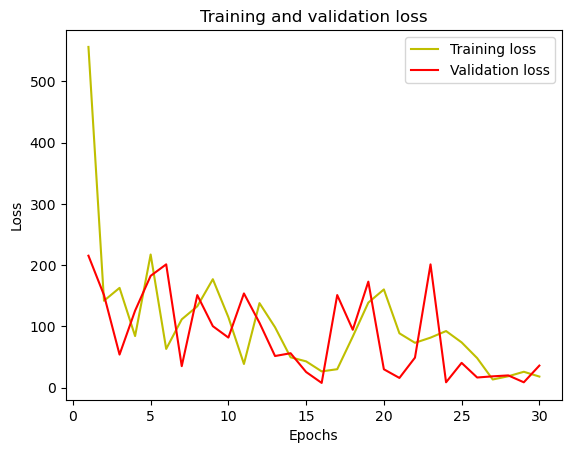

In [51]:
# 손실과 검증 손실을 시각화
loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

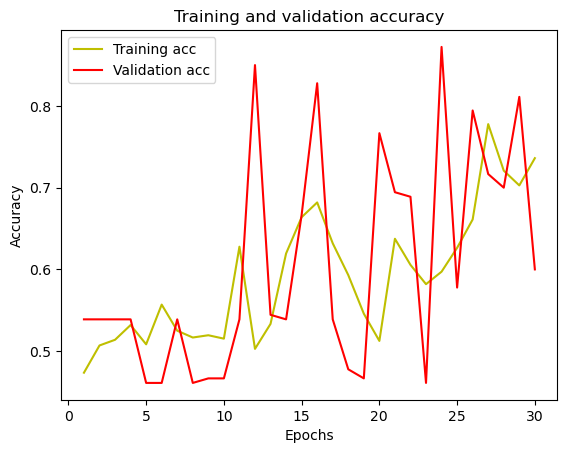

In [53]:
# 정확도와 검증 정확도를 시각화
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [55]:
# 모델 성능 평가
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.57      1.00      0.73        97
           1       1.00      0.13      0.23        83

    accuracy                           0.60       180
   macro avg       0.79      0.57      0.48       180
weighted avg       0.77      0.60      0.50       180

[[97  0]
 [72 11]]
